In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_pickle(r'preprocessed_df.pkl')

In [4]:
'''We now no more require the actual Headlines'''
df=df.drop(['Headlines','word2vec','headlines_words'],axis=1)

In [5]:
df.head()[:2]

,Date,Label,headlines_str
0,2000-01-03,0,hindrance operation extract leaked report scor...
1,2000-01-04,0,scorecard best lake scene leader german sleaze...


In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
train = df[df['Date'] < '20150101'].drop('Date',axis=1)
test = df[df['Date'] > '20141231'].drop('Date',axis=1)

# Model hyper-parameter tuning

In [8]:
count_vect = CountVectorizer(analyzer='word')
tfidf_vect = TfidfVectorizer(analyzer='word')

## `Naive Baye's Model with Count Vectorizer`

In [9]:
model=MultinomialNB()
param={'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
gcv=GridSearchCV(model,param_grid=param,n_jobs=-1,scoring='accuracy')
gcv.fit(count_vect.fit_transform(train.headlines_str),train.Label)

GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [12]:
gcv.best_score_,gcv.best_estimator_

(0.7275471698113208, MultinomialNB(alpha=0.1))

Model Fitting

In [13]:
model=MultinomialNB(alpha=0.1)
model.fit(count_vect.fit_transform(train.headlines_str),train.Label)

MultinomialNB(alpha=0.1)

In [14]:
y_pred=model.predict(count_vect.transform(test.headlines_str))

In [15]:
display(confusion_matrix(test.Label,y_pred))
print('\n',classification_report(test.Label,y_pred))

array([[158,  28],
       [ 25, 167]], dtype=int64)


               precision    recall  f1-score   support

           0       0.86      0.85      0.86       186
           1       0.86      0.87      0.86       192

    accuracy                           0.86       378
   macro avg       0.86      0.86      0.86       378
weighted avg       0.86      0.86      0.86       378



## `Random Forest with Count Vectorizer`

In [17]:
model=RandomForestClassifier(n_jobs=-1,warm_start=True)
param={'n_estimators':[50,100,250,300,200],
    'criterion':['gini','entropy'],
    'max_depth':[10,25,50,75],
    'min_samples_split':[1,2,3,4,6,8]}

In [18]:
gcv=GridSearchCV(model,param_grid=param,n_jobs=-1,scoring='accuracy')
gcv.fit(count_vect.fit_transform(train.headlines_str),train.Label)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, warm_start=True),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 25, 50, 75],
                         'min_samples_split': [1,2,3,4,6,8],
                         'n_estimators': [50, 100, 250, 300, 200]},
             scoring='accuracy')

In [19]:
gcv.best_score_,gcv.best_estimator_

(0.5267924528301886,
 RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=250, n_jobs=-1,
                        warm_start=True))

Model Fitting

In [20]:
model=RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=250,
                        n_jobs=-1, warm_start=True)
model.fit(count_vect.fit_transform(train.headlines_str),train.Label)

RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=250,
                       n_jobs=-1, warm_start=True)

In [21]:
y_pred=model.predict(count_vect.transform(test.headlines_str))

In [22]:
display(confusion_matrix(test.Label,y_pred))
print('\n',classification_report(test.Label,y_pred))

array([[135,  51],
       [ 12, 180]], dtype=int64)


               precision    recall  f1-score   support

           0       0.92      0.73      0.81       186
           1       0.78      0.94      0.85       192

    accuracy                           0.83       378
   macro avg       0.85      0.83      0.83       378
weighted avg       0.85      0.83      0.83       378



## `KNN Model with TFID Vectorizer `

In [23]:
model=KNeighborsClassifier()
param={'n_neighbors':[3,5,7,9,11],
    'weights':['uniform','distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[20,30,40]}

In [24]:
gcv=GridSearchCV(model,param_grid=param,scoring='accuracy')
gcv.fit(count_vect.fit_transform(train.headlines_str),train.Label)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [25]:
gcv.best_score_,gcv.best_estimator_

(0.5280503144654088, KNeighborsClassifier(leaf_size=20, n_neighbors=7))

Model Fitting


In [26]:
model=KNeighborsClassifier(leaf_size=20, n_neighbors=7,n_jobs=-1)
model.fit(count_vect.fit_transform(train.headlines_str),train.Label)

KNeighborsClassifier(leaf_size=20, n_jobs=-1, n_neighbors=7)

In [27]:
y_pred=model.predict(count_vect.transform(test.headlines_str))

In [28]:
display(confusion_matrix(test.Label,y_pred))
print('\n',classification_report(test.Label,y_pred))

array([[ 29, 157],
       [ 10, 182]], dtype=int64)


               precision    recall  f1-score   support

           0       0.74      0.16      0.26       186
           1       0.54      0.95      0.69       192

    accuracy                           0.56       378
   macro avg       0.64      0.55      0.47       378
weighted avg       0.64      0.56      0.48       378



#### The Best Model during the training process resulted the least perfromance

#### We'll be selecting `Naive Baye's Model` in comparision to 'Random Forest' as both the F1 Score for the classification are better

## AOC_RUC Analysis

#### The purpose of this Analysis was to reduce the `False Positive Rate`, so that the investor/trader can save money by pulling out in the model's false claims

In [29]:
model=MultinomialNB(alpha=0.1)
model.fit(count_vect.fit_transform(train.headlines_str),train.Label)

MultinomialNB(alpha=0.1)

In [30]:
y_pred_prob=model.predict_proba(count_vect.transform(test.headlines_str))[:,1]
y_pred_prob

array([1.00000000e+00, 5.69340289e-16, 4.62861513e-21, 1.00000000e+00,
       1.00000000e+00, 1.51899121e-16, 1.60877488e-08, 5.39984196e-07,
       4.00466611e-16, 1.14456801e-17, 9.99999573e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.53298102e-14, 1.00000000e+00,
       5.00305937e-12, 8.16951020e-10, 1.00000000e+00, 1.98079806e-11,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.40773258e-15, 2.61412668e-13, 1.00000000e+00, 2.66568238e-12,
       9.99999982e-01, 9.99999992e-01, 1.00000000e+00, 8.76073322e-19,
       1.97819017e-17, 1.00000000e+00, 1.46530865e-11, 9.99999931e-01,
       1.00000000e+00, 2.24279829e-12, 4.14863864e-28, 1.00000000e+00,
       2.25212093e-13, 1.74003372e-16, 1.00000000e+00, 7.16340165e-27,
       1.00000000e+00, 3.97329496e-22, 1.28994144e-12, 1.00000000e+00,
       1.67312703e-13, 9.99999997e-01, 1.24833216e-13, 1.00000000e+00,
       4.89811147e-16, 1.00000000e+00, 2.60276318e-13, 8.90398019e-16,
      

In [31]:
threshold=np.arange(0.00,1.0,0.01)

In [32]:
tpr,fpr,fnr=[],[],[]
for k in threshold:
    res=[np.where(r>k,1,0) for r in y_pred_prob]
    c=confusion_matrix(test.Label,res)
    tpr.append(c[1,1]/(c[1,1]+c[1,0]))
    fpr.append(c[0,1]/(c[0,0]+c[0,1]))
    fnr.append(c[1,0]/(c[1,0]+c[1,1]))

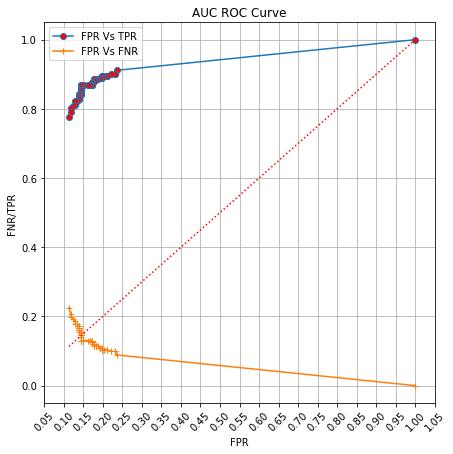

In [33]:
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,marker='o',markerfacecolor='r',label='FPR Vs TPR')
plt.plot(fpr,fnr,marker='+',markerfacecolor='black',label='FPR Vs FNR')
sns.lineplot(x=threshold)
plt.plot(fpr,fpr,linestyle=':',c='r')
plt.legend()
plt.xlabel('FPR')
plt.grid()
plt.ylabel('FNR/TPR')
plt.title('AUC ROC Curve')
plt.xticks(ticks=np.arange(0.05,1.1,0.05),rotation=45)
plt.show()

In [34]:
roc_auc=pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':threshold})

In [36]:
print(roc_auc[roc_auc.FPR<=0.139785].sort_values(by='Threshold'))

         TPR       FPR  Threshold
72  0.843750  0.139785       0.72
73  0.838542  0.139785       0.73
74  0.838542  0.139785       0.74
75  0.838542  0.139785       0.75
76  0.838542  0.139785       0.76
77  0.838542  0.139785       0.77
78  0.838542  0.139785       0.78
79  0.838542  0.139785       0.79
80  0.838542  0.139785       0.80
81  0.838542  0.139785       0.81
82  0.838542  0.139785       0.82
83  0.838542  0.139785       0.83
84  0.833333  0.139785       0.84
85  0.833333  0.139785       0.85
86  0.833333  0.139785       0.86
87  0.833333  0.139785       0.87
88  0.828125  0.139785       0.88
89  0.828125  0.139785       0.89
90  0.828125  0.139785       0.90
91  0.828125  0.139785       0.91
92  0.822917  0.134409       0.92
93  0.822917  0.134409       0.93
94  0.822917  0.129032       0.94
95  0.812500  0.129032       0.95
96  0.807292  0.123656       0.96
97  0.802083  0.118280       0.97
98  0.791667  0.118280       0.98
99  0.776042  0.112903       0.99


#### From the FPR vs Threhold values, I found that the FPR was nearly constant for a range of values. FPR=0.139 seemed perfect in this situation. The min. threshold for the same FPR was selected.

In [37]:
thres_select=0.72
# Threshold changed from 0.5 to 0.72

res=[np.where(r>thres_select,1,0) for r in y_pred_prob]   ## Predicted Probability

In [38]:
print("----------------------------------------------------------------------")

print("The Confusion Metric")
display(confusion_matrix(test.Label,res))
print("----------------------------------------------------------------------")

print("\nThe Classification Report")
print("\n",classification_report(test.Label,res))
print("----------------------------------------------------------------------")

print("\nFPR Obtained: {}%\n".format(round(confusion_matrix(test.Label,res)[0,1]*100/(confusion_matrix(test.Label,res)[0,0]+confusion_matrix(test.Label,res)[0,1]),2)))

----------------------------------------------------------------------
The Confusion Metric


array([[160,  26],
       [ 30, 162]], dtype=int64)

----------------------------------------------------------------------

The Classification Report

               precision    recall  f1-score   support

           0       0.84      0.86      0.85       186
           1       0.86      0.84      0.85       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378

----------------------------------------------------------------------

FPR Obtained: 13.98%

